# ARIMA Baseline for Univariate, Multistep

An implementatin of an ARIMA model using the ```statsmodels.tas.arima_model``` for the univariate, multistep problem. The model uses 30 timesteps back to predict 30 timesteps forward. Data pre-processing has been completed in another notebook.

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
import tqdm
%matplotlib inline

## Load Data

In [2]:
if True:
    keep_col = list(range(1,18))

    df_day = pd.read_csv('Clean Data/ECL_Clean_Day.csv', 
                         infer_datetime_format=True,
                         parse_dates=['Timestamp'], 
                         index_col=['Timestamp'],
                         usecols = keep_col,
                         date_parser=lambda col: pd.to_datetime(col, utc=True).tz_convert('America/New_York'))

    #df_min.dtypes
    print (df_day.shape)
    #df_day.head(5)

(5031, 16)


In [3]:
df_day.describe()

,Open,High,Low,Close,Volume,SMA_10,SMA_50,EMA_10,EMA_50,RSI,ROC,MACD_Line,MACD_Diff,MACD_Sig,WO,ATR
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03,5022.000000,4982.000000,5022.000000,4982.000000,5031.000000,5019.000000,4982.000000,4974.000000,4974.000000,5003.000000,5031.000000
mean,67.781848,68.702433,66.861038,67.808120,1.086004e+06,67.744748,67.478378,67.746502,67.474928,52.987576,2.667431,0.701917,-0.000647,0.703330,52.543226,1.908105
std,48.108253,47.971561,48.214697,48.110473,8.833957e+05,47.930289,47.347909,47.926039,47.297619,9.694137,22.554656,2.032134,0.621090,1.910919,10.128555,1.692945
min,7.120000,7.625000,7.063000,7.203000,1.185000e+05,10.974600,13.944700,11.038640,14.326320,0.000000,-61.754127,-7.238685,-3.319137,-6.345875,12.749321,0.000000
25%,32.090000,32.325000,31.775000,32.015000,5.974000e+05,32.188250,32.500800,32.173813,32.579855,46.270038,-1.845705,-0.339209,-0.276496,-0.258434,46.044694,0.809929
50%,46.760000,47.220000,46.170000,46.720000,8.626640e+05,46.679600,46.472049,46.681112,46.332841,52.845012,0.659404,0.572232,-0.009688,0.538696,52.518535,1.272870
75%,109.782500,110.505000,109.130000,109.950000,1.311234e+06,109.802000,109.440162,109.757625,109.727184,58.858874,3.255239,1.644758,0.295044,1.560963,59.452563,2.281402
max,209.220000,209.870000,206.430000,208.550000,2.374391e+07,205.964000,201.545800,205.640376,200.930593,100.000000,158.275261,10.448297,3.128339,9.304025,85.169495,9.883761


In [4]:
# create 10 years of data from 2019 - 2010
day_data = df_day[df_day.index >= '2010-01-01']

#split 7 years train, 3 years test
day_train = day_data[day_data.index <= '2017-01-01']
day_test = day_data[day_data.index >= '2017-01-01']
base_train = day_train['Close'] 
base_test = day_test['Close']

## Fit ACF and PACF
Fitting an Autocorrelation and Partial Autocorrelation plot to help select the params for the ARIMA model.

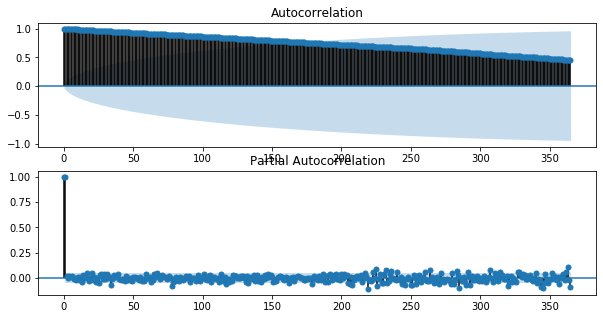

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10,5))
lags = 365
# acf
axis = plt.subplot(2, 1, 1)
plot_acf(base_train.to_numpy(), ax=axis, lags=lags)
# pacf
axis = plt.subplot(2, 1, 2)
plot_pacf(base_train.to_numpy(), ax=axis, lags=lags)
# show plot
plt.show()

Zooming into 7 lags to read the pacf plot

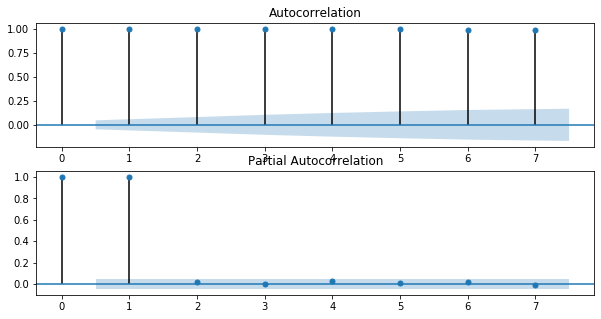

In [6]:
plt.figure(figsize=(10,5))
lags = 7
# acf
axis = plt.subplot(2, 1, 1)
plot_acf(base_train.to_numpy(), ax=axis, lags=lags)
# pacf
axis = plt.subplot(2, 1, 2)
plot_pacf(base_train.to_numpy(), ax=axis, lags=lags)
# show plot
plt.show()

Looking at the charts above we can infer:
* p = 100 - 200 (region where autocorrelation drops below the confidence interval)
* q = 1 (from partial autocorrelation plot)

## Test Fit an ARIMA Model

In [7]:
#Test Fit the ARIMA model and see what the prediction looks like

if False:
    model = ARIMA(base_train, order=(100,1,1))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=30)
    print ('Prediction:','\n',pred[0])

Given the p value of 100, this takes a very long time to fit. I will simplify the model to (25,1,1) in the interests of having a model fit on my laptop.

In [8]:
#Test Fit the ARIMA model and see what the prediction looks like

if True:
    model = ARIMA(base_train, order=(15,1,1))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=30)
    print ('Test Prediction:')
    print ('\n')
    print (pred[0])

/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Prediction: 
 [117.07896388 117.20248509 117.21239566 117.38604144 117.3646706
 117.40283894 117.52230753 117.5901161  117.63441764 117.65867605
 117.78569442 117.83587283 117.93781642 117.98985296 118.07015435
 118.1471518  118.21462652 118.29439341 118.36625848 118.43140517
 118.50228226 118.57034851 118.63996641 118.70149257 118.76902214
 118.83060563 118.8952196  118.95575053 119.01689636 119.07703006]


## Walk-Forward Validation

In order to test how the ARIMA model does over time, I'll walk the model forward 30 steps (days) at a time.

In [9]:
#Inputs for Walk-Forward
X = day_data['Close']
n_train = len(base_train)
n_records = len(base_train)+len(base_test)
step = 30
predictions = list()
pred_dict = dict()
errors = list()
count = 0

#Main Loop
for i in tqdm.tqdm_notebook(np.arange(n_train, n_records, step)):
    
    #Split Data
    train, test = X[0:i], X[i:i+step]
    #train, test = X[(step*count):i], y[(count * (step-1)): ((count+1)*(step))]
    
    #Create Model
    model = ARIMA(train, order=(15,1,1))
    
    #Fit the Model
    model_fit = model.fit()
    
    #Create the Prediction
    output = model_fit.forecast(steps=30)    
    
    #Save the Output to predictions list
    predictions.append(output[0])
    
    #Create Output df that includes the day of each forecast (ie. forecast horizon)
    res = pd.DataFrame(list(range(1,31)), columns=['Day'])
    res['Pred'] = output[0]
    
    #Append the df to the pred_dict dictionary for plotting below
    pred_dict[count] = res
    
    #Calcuate Error
    #N.B. Last iteration is always diff shape we'll just calculate with what we have
    mae = metrics.mean_absolute_error(test,output[0][0:len(test)])
    rmse = metrics.mean_squared_error(test,output[0][0:len(test)])
    
    #Append Error to List
    err = [count+1, mae, rmse]
    errors.append(err)
    
    #Print Update
    print('Iteration:',count+1)
    print('MAE:',mae)
    print('RMSE:',rmse)
    
    #Increase Counter
    count += 1

/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 1
MAE: 1.7955082213107048
RMSE: 4.175160950321279


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 2
MAE: 1.4359813926344391
RMSE: 2.5783870211575888


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 3
MAE: 1.1269408936472787
RMSE: 2.7699314831465873


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 4
MAE: 4.2676186113902
RMSE: 24.650328014342918


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 5
MAE: 0.6346899346067317
RMSE: 0.5652276082641855


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 6
MAE: 1.7471715420166674
RMSE: 3.9710413225102177


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 7
MAE: 0.8947171687780582
RMSE: 1.4114519926351397


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 8
MAE: 1.608067584406888
RMSE: 4.62120018423423


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 9
MAE: 1.4519350634245627
RMSE: 3.006512835962964


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 10
MAE: 5.880343564565209
RMSE: 43.649557104744225


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 11
MAE: 4.294728611264972
RMSE: 33.24740933244761


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 12
MAE: 1.5805577549963572
RMSE: 3.516581093647919


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 13
MAE: 3.654700538433832
RMSE: 18.569265517203284


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 14
MAE: 4.225513079273698
RMSE: 22.6930793953581


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 15
MAE: 5.522863748286912
RMSE: 35.194578786050336


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 16
MAE: 5.628824466256684
RMSE: 46.943587157135845


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 17
MAE: 6.1191606290715
RMSE: 54.106864063517136


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 18
MAE: 8.878381674113033
RMSE: 108.01627253886663


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 19
MAE: 6.269442367958166
RMSE: 55.02540514517273


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 20
MAE: 1.9281170454444199
RMSE: 4.715976380725132


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 21
MAE: 7.7367092623694935
RMSE: 85.64176126681281


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 22
MAE: 2.981970076872204
RMSE: 15.802580382925575


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 23
MAE: 6.368610177618273
RMSE: 64.6126742374083


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 24
MAE: 7.198816440102551
RMSE: 57.884121687021484


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 25
MAE: 3.774311353282302
RMSE: 19.208163328827016


/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jacobscottanthony/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Iteration: 26
MAE: 0.6928342219768524
RMSE: 0.7624520585645707



## Validation Results

In [10]:
#Check the shape of the outputs from the walk forward. Perform any necessary transformations in order to visualize the results.

#predictions
#errors
#pred_dict

In [11]:
#Unravel the predictions array in order to plot the prediction vs actual

pred = np.concatenate(predictions).ravel().tolist()

In [12]:
#Create a df with datetimeindex, append the unraveled prediction to it.
#Slice the prediction to the same length as df (it'll always be longer due to train/test split)

results = pd.DataFrame(base_test)
results['Pred'] = pred[:len(results)]

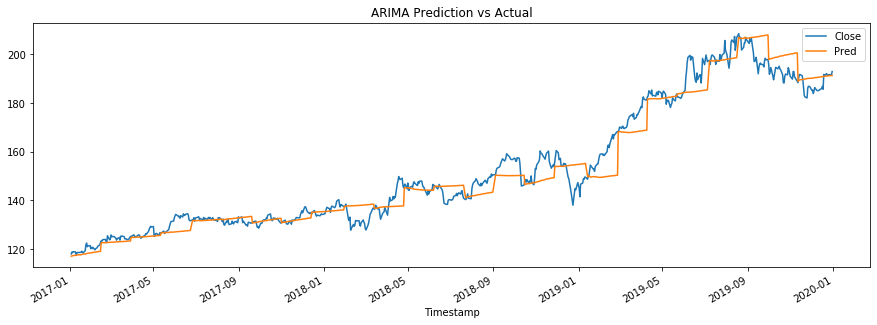

In [13]:
results.plot(figsize=(15,5), title='ARIMA Prediction vs Actual')

In [14]:
#Total Error for the Walk Fowrard
total_MAE = metrics.mean_absolute_error(results['Close'], results['Pred'])
total_RMSE = metrics.mean_squared_error(results['Close'], results['Pred'])

print('Aggregate Error for the Walk Forward Validation:')
print('Mean Absolute Error:',total_MAE)
print('Mean Squared Error:',total_RMSE)

Aggregate Error for the Walk Forward Validation:
Mean Absolute Error: 3.863318001262151
Mean Squared Error: 28.51507078666769


In [15]:
# Calculate the Correlation between the Actual and Predicted Closing Price over the Test Period

results.corr(method='pearson')

,Close,Pred
Close,1.000000,0.979474
Pred,0.979474,1.000000


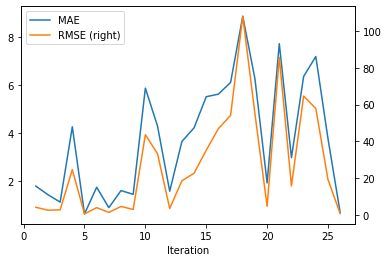

In [16]:
# Plot the Error vs Iteration (step) to see if the model increases it's accuracy over time

error_df = pd.DataFrame.from_records(errors, columns=['Iteration', 'MAE', 'RMSE'])
error_df.plot(x='Iteration', y=['MAE','RMSE'], secondary_y=['RMSE'])

In [17]:
#Combine all the dfs in the pred_dict dictionary in order to plot the error by forecast horizon

combined = pd.concat(pred_dict.values(), ignore_index=True)
combined = combined[0:len(base_test.values)]
combined['Actual'] = base_test.values
#combined

In [18]:
#calculate our the error by day in the forecast

error_by_day = list()

for i in range(1,31):
    df = combined[combined.Day == i]
    err_MSE = metrics.mean_squared_error(df['Actual'],df['Pred'])
    err_MAE = metrics.mean_absolute_error(df['Actual'],df['Pred'])
    error = [i, err_MAE,err_MSE]
    error_by_day.append(error)

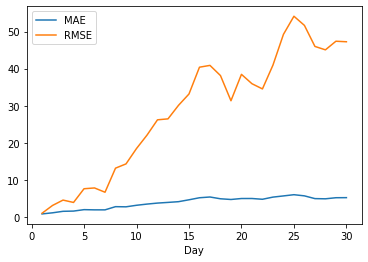

In [19]:
error_by_day = pd.DataFrame.from_records(error_by_day, columns=['Day', 'MAE', 'RMSE'])
error_by_day.plot(x='Day', y=['MAE','RMSE'])

## Baseline Summary
* The Baseline ARIMA model has been trained and walked forward over the test set
* Model showed MAE = 3.86
* Model showed RMSE = 28.5
* Model showed PCC = 0.979
* The model did not show significant improvement in model accuracy with increase training set size
* As expected the model accuracy decreases with an increasing forecast horizon